# Data sets

In [1]:
%matplotlib inline

In [2]:
from io import StringIO
from IPython.display import display
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
import random
import seaborn as sns
from sklearn import datasets, feature_extraction, metrics, naive_bayes 

random_state = np.random.RandomState(0)

def print_dataset_info(data):
    print(data.DESCR)

    print('')
    print('-'*80)
    print('')
    for key in data.keys():
        if hasattr(data[key], 'shape'):
            print('{} size {}'.format(key, data[key].shape))

def print_features(data, feature_names=None):
    df = pd.DataFrame(data.data, columns=data.feature_names if hasattr(data, 'feature_names') else feature_names)
    display(df.describe())
    display(df.tail())
    
def draw_target_data_distribution(data):
    plt.figure()
    if len(data.target.shape) < 2:
        sns.kdeplot(data.target, shade=True);
    else:
        labels = data.target_names if hasattr(data, 'target_names') else range(len(data.target.T))
        for label, target in zip(labels, data.target.T):
            sns.kdeplot(target, label=label, shade=True);
        plt.legend()
        
def draw_feature_pair_grid(data):
    df = pd.DataFrame(data.data, columns=data.feature_names)
    if df.shape[1] > 3:
        g = sns.PairGrid(df.sample(axis=1, n=3, random_state=random_state), diag_sharey=False);
    else:
        g = sns.PairGrid(df, diag_sharey=False);
    g.map_lower(sns.kdeplot, cmap="Blues_d");
    g.map_upper(plt.scatter);
    g.map_diag(sns.kdeplot, lw=3);
        
def draw_pair_grid(values, values_names=None, idxs=None):
    df = pd.DataFrame(values, columns=values_names)
    if idxs:
        data = df.iloc[:, idxs]
    elif df.shape[1] > 3:
        data = df.sample(axis=1, n=3, random_state=random_state)
    else:
        data = df
    g = sns.PairGrid(data, diag_sharey=False);
    g.map_lower(sns.kdeplot, cmap="Blues_d");
    g.map_upper(plt.scatter);
    g.map_diag(sns.kdeplot, lw=3);
    
def draw_generated_dataset(data):
    features = data[0]
    feature_names = ['feature_{}'.format(idx) for idx in range(features.shape[1])]

    target = data[1]
    df = pd.DataFrame(np.c_[features, target], 
                      columns=feature_names + ['category'])
    display(df.tail())

    g = sns.PairGrid(data=df, hue='category', palette="GnBu_d", vars=random.sample(feature_names, k=min(3, len(feature_names))))
    g.map_diag(sns.kdeplot)
    g.map_offdiag(plt.scatter, s=50, edgecolor="white")
    g.add_legend();
    
def draw_generated_multilabeled_dataset(features, target):
    feature_names = ['feature_{}'.format(idx) for idx in range(features.shape[1])]
    target_names = ['target_{}'.format(idx) for idx in range(target.shape[1])]
    df = pd.DataFrame(np.c_[features, target], columns=feature_names + target_names)
    display(df.tail())

    g = sns.FacetGrid(df, col="target_1", row='target_2', hue="target_0")
    g.map(plt.scatter, "feature_0", "feature_1", alpha=.7);

##  Toy datasets
### Boston House Prices

# info
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88



# target data


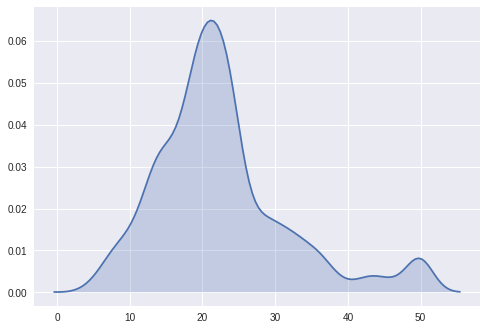

In [3]:
data = datasets.load_boston()

print('# info')
print_dataset_info(data)
print()
print('# features')
print_features(data)
print()
print('# target data')
draw_target_data_distribution(data)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


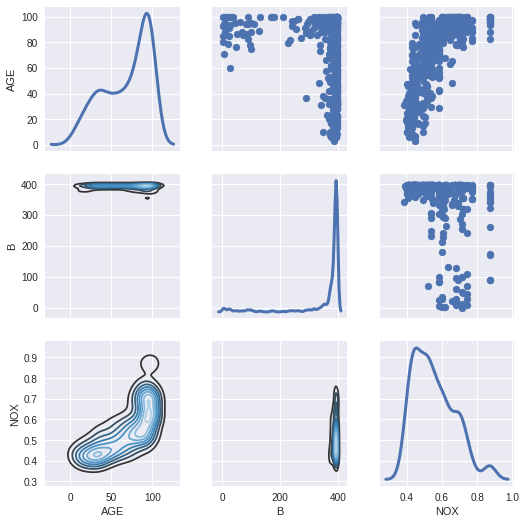

In [4]:
draw_feature_pair_grid(data)

### Iris

In [5]:
data = datasets.load_iris()

print('# info')
print_dataset_info(data)
print()
print('# features')
print_features(data)

# info
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


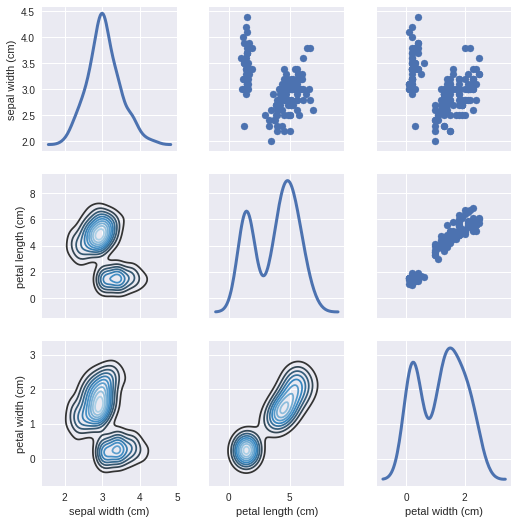

In [6]:
draw_feature_pair_grid(data)

### Diabetes

# info
Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tib

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064



# target data


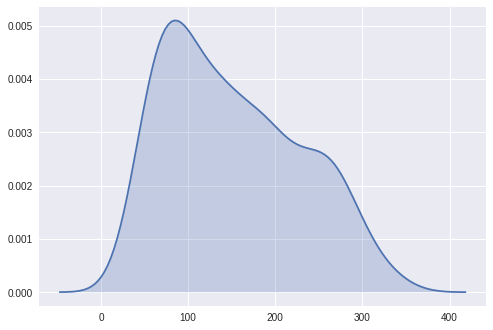

In [7]:
data = datasets.load_diabetes()
print('# info')
print_dataset_info(data)
print()
print('# features')
print_features(data)
print()
print('# target data')
draw_target_data_distribution(data)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


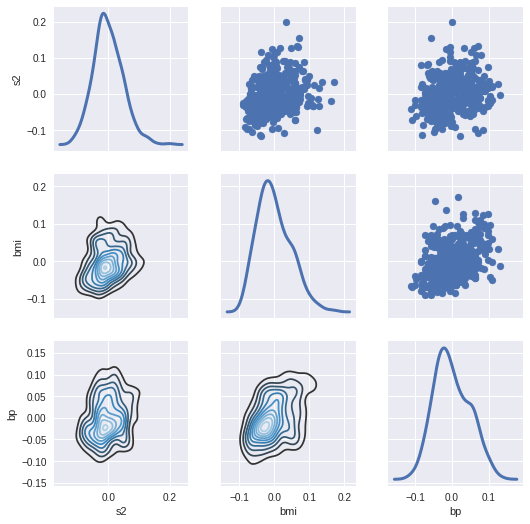

In [8]:
draw_feature_pair_grid(data)

### Digits (archive.ics.uci.edu)

In [9]:
data = datasets.load_digits()

print('# info')
print_dataset_info(data)
print()
print('# features')
print_features(data)

# info
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each eleme

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,8.0,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0


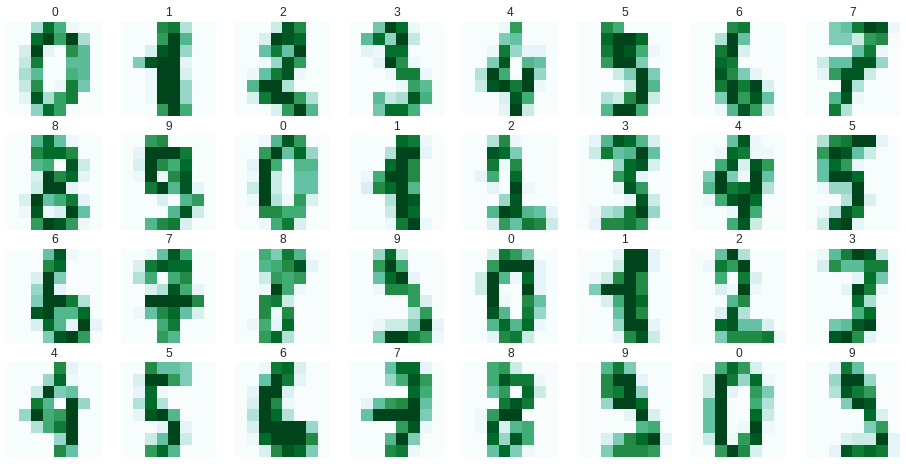

In [10]:
plt.figure(figsize=(16,8))
for idx, (img, target_name) in enumerate(zip(data.images[:32], data.target[:32])):
    plt.subplot(4, 8, idx + 1)
    plt.title(target_name)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.BuGn)
    # hmm, somehow img is reverted. pcolor shows it in oposit direction. so we revert it back img[::-1]
#     plt.pcolor(img[::-1], cmap = 'Greys', linewidth =.5, color = 'k', vmin = 0);


### Linnerud

# info
Linnerrud dataset

Notes
-----
Data Set Characteristics:
    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset constains two small dataset:

- *exercise*: A list containing the following components: exercise data with
  20 observations on 3 exercise variables: Weight, Waist and Pulse.

- *physiological*: Data frame with 20 observations on 3 physiological variables:
   Chins, Situps and Jumps.

References
----------
  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.


--------------------------------------------------------------------------------

data size (20, 3)
target size (20, 3)

# features


,Chins,Situps,Jumps
count,20.000000,20.000000,20.00000
mean,9.450000,145.550000,70.30000
std,5.286278,62.566575,51.27747
min,1.000000,50.000000,25.00000
25%,4.750000,101.000000,39.50000
50%,11.500000,122.500000,54.00000
75%,13.250000,210.000000,85.25000
max,17.000000,251.000000,250.00000


,Chins,Situps,Jumps
15,12.0,210.0,120.0
16,4.0,60.0,25.0
17,11.0,230.0,80.0
18,15.0,225.0,73.0
19,2.0,110.0,43.0


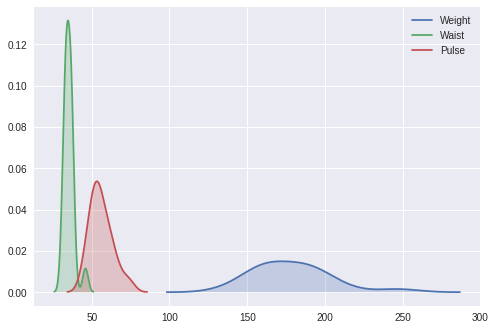

In [11]:
data = datasets.load_linnerud()

print('# info')
print_dataset_info(data)
print()
print('# features')
print_features(data)
draw_target_data_distribution(data)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


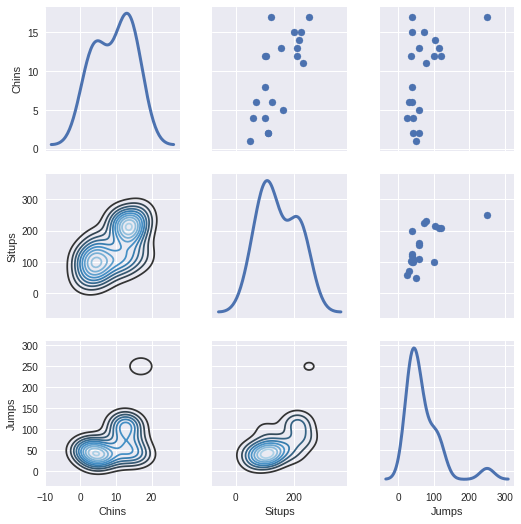

In [12]:
draw_pair_grid(data.data, data.feature_names)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


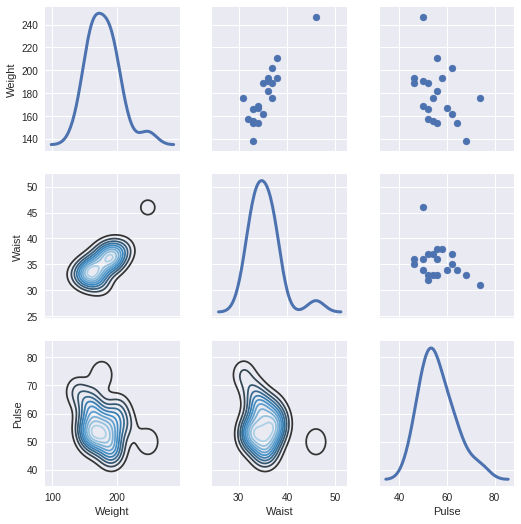

In [13]:
draw_pair_grid(data.target, data.target_names)

### Breast Cancer Wisconsin (Diagnostic)

# info
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


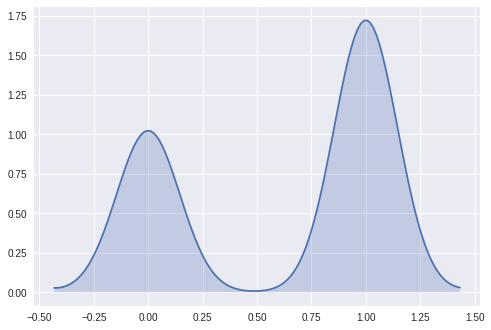

In [14]:
data = datasets.load_breast_cancer()

print('# info')
print_dataset_info(data)
print()
print('# features')
print_features(data)
draw_target_data_distribution(data)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


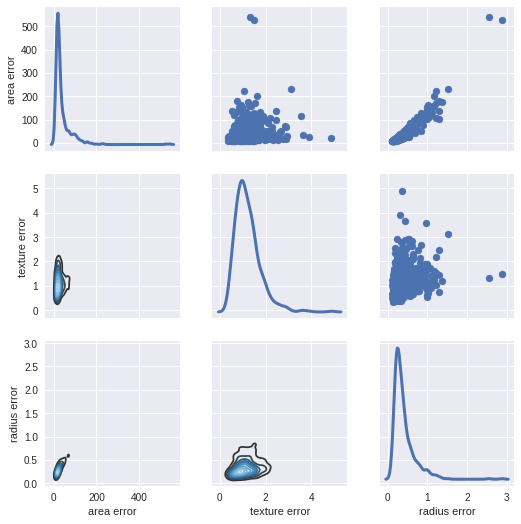

In [15]:
draw_feature_pair_grid(data)

## Images

# info
Image: china.jpg
Released under a creative commons license. [1]
Attribution: Some rights reserved by danielbuechele [2]
Retrieved 21st August, 2011 from [3] by Robert Layton

[1] http://creativecommons.org/licenses/by/2.0/
[2] http://www.flickr.com/photos/danielbuechele/
[3] http://www.flickr.com/photos/danielbuechele/6061409035/sizes/z/in/photostream/


Image: flower.jpg
Released under a creative commons license. [1]
Attribution: Some rights reserved by danielbuechele [2]
Retrieved 21st August, 2011 from [3] by Robert Layton

[1] http://creativecommons.org/licenses/by/2.0/
[2] http://www.flickr.com/photos/vultilion/
[3] http://www.flickr.com/photos/vultilion/6056698931/sizes/z/in/photostream/





--------------------------------------------------------------------------------



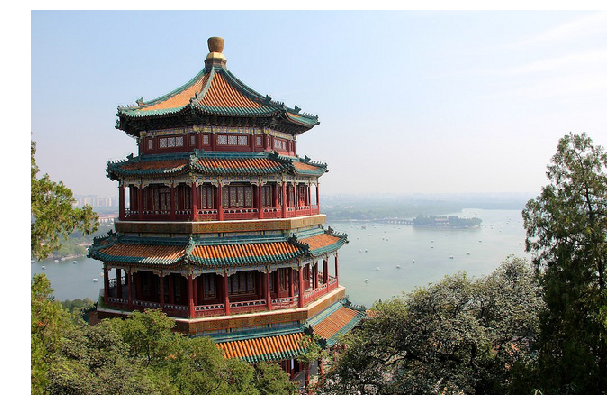

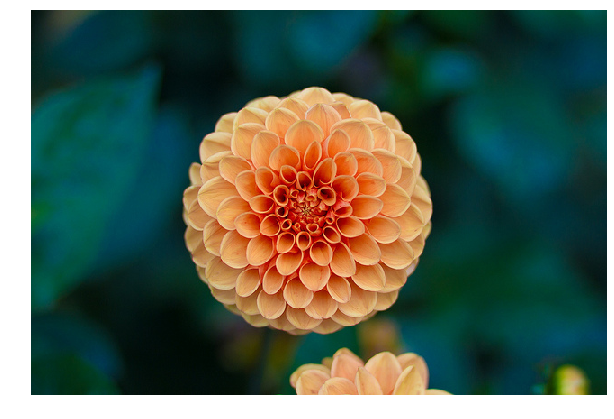

In [16]:
data = datasets.load_sample_images()

print('# info')
print_dataset_info(data)
for title, img in zip(data.filenames, data.images):
    plt.figure()
    plt.title(title)
    ax = plt.axes([0, 0, 1, 1])
    plt.axis('off')
    plt.imshow(img)

### Generators

#### blobs

,feature_0,feature_1,category
95,-2.931698,8.757898,2.0
96,-6.182296,-5.670854,0.0
97,-8.846756,-3.326036,0.0
98,-7.263630,-3.743755,1.0
99,-6.525597,-6.127714,1.0


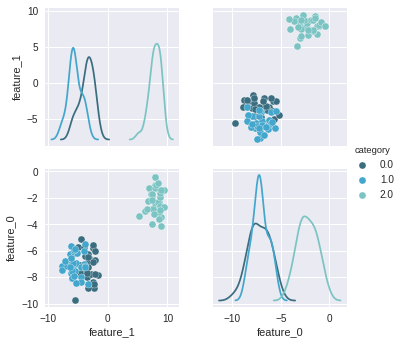

In [17]:
data = datasets.make_blobs(random_state=random_state)
draw_generated_dataset(data)

#### classsification

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,category
95,0.273366,-2.202824,1.207578,0.769230,1.295200,0.750175,-0.552098,-1.624646,3.054314,0.318468,...,-0.045408,-0.748451,1.306483,0.379122,0.858980,1.769448,-0.126516,-0.753314,1.341295,1.0
96,0.494112,-0.292298,-0.017521,-0.530460,0.458672,0.543332,1.381570,-0.081800,2.316119,0.353264,...,0.853165,-1.074968,1.249685,-0.961872,0.502787,-0.807570,-0.805696,1.753953,0.568528,1.0
97,0.148640,0.618209,-1.959031,-0.130538,-0.208454,-1.144598,0.885558,-0.604325,0.083380,1.297136,...,0.449558,0.237248,0.727350,0.158763,-0.650349,-1.009658,0.335812,-0.879828,0.071378,1.0
98,0.327641,2.266747,0.097065,-1.511254,0.654150,-1.006639,-1.044558,-0.235146,-0.601477,0.158030,...,0.230325,0.218172,-0.315175,-2.354322,0.020428,-3.207169,0.328584,-0.839461,1.634981,0.0
99,-0.344831,0.080029,-2.454251,-0.448379,1.170322,-0.179686,-0.126783,0.078617,-1.508699,2.143832,...,0.624895,-1.636920,0.351056,-0.441949,-0.496818,0.698182,0.032321,0.395376,0.121701,0.0


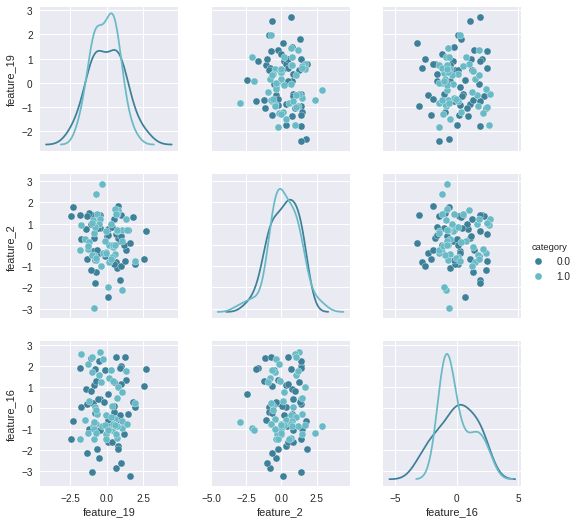

In [18]:
data = datasets.make_classification(random_state=random_state)
draw_generated_dataset(data)

,feature_0,feature_1,category
95,-1.433262,-2.514646,2.0
96,-1.171183,0.285941,1.0
97,-1.627844,0.301670,2.0
98,0.907578,-0.482898,1.0
99,0.819727,1.232317,2.0


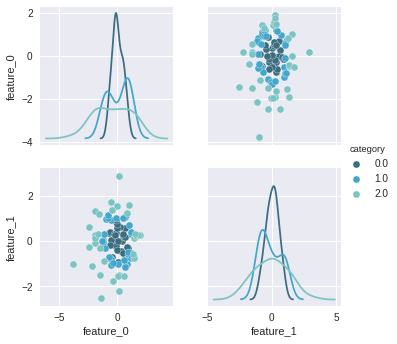

In [19]:
data = datasets.make_gaussian_quantiles()
draw_generated_dataset(data)

#### hastie 10_2

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,category
95,0.914538,-0.333516,0.626365,2.837650,-0.162181,1.552111,1.277672,-0.442066,-0.840133,-0.625514,1.0
96,-0.014387,-0.237320,-0.468113,1.070959,-2.151632,-0.688403,-0.158064,0.369940,-0.028668,-0.753194,-1.0
97,1.136710,-0.865879,0.842440,0.449099,-0.716753,0.600781,1.072422,1.581477,-0.644798,0.210158,-1.0
98,0.517725,-1.567747,0.479273,-0.368967,-0.011524,-1.226139,0.326591,0.210737,1.302023,-0.274147,-1.0
99,0.790494,1.260014,-1.184842,0.108921,-1.552915,-0.610881,1.088326,-0.337890,-3.555683,1.519216,1.0


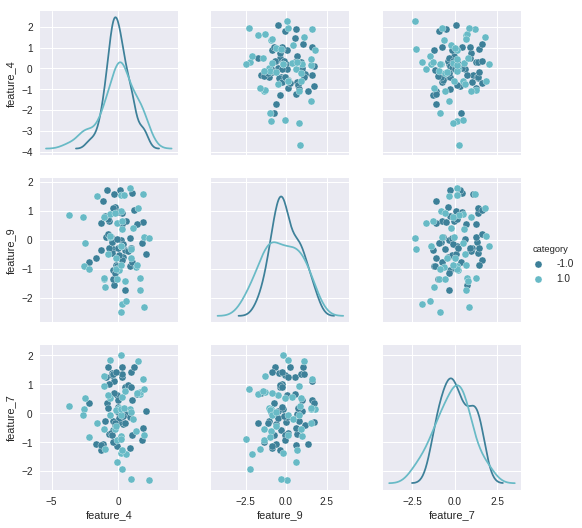

In [20]:
dataset = datasets.make_hastie_10_2(n_samples=100)
draw_generated_dataset(dataset)

#### circles

,feature_0,feature_1,category
95,-0.337326,0.623182,1.0
96,0.126496,1.168356,0.0
97,0.517650,-0.731890,1.0
98,1.024529,0.037806,0.0
99,-0.264631,1.012234,0.0


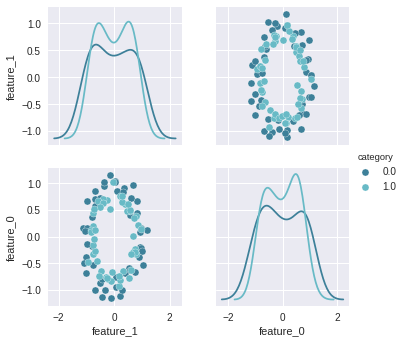

In [21]:
data = datasets.make_circles(noise=0.1)
draw_generated_dataset(data)

#### moons

,feature_0,feature_1,category
95,1.033453,0.481483,0.0
96,-0.879298,-0.180025,0.0
97,0.150089,0.351705,1.0
98,0.280447,0.775715,0.0
99,0.543809,-0.400251,1.0


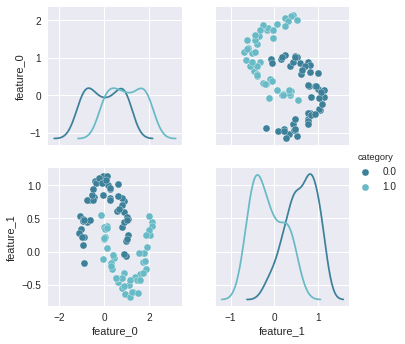

In [22]:
data = datasets.make_moons(noise=0.1)
draw_generated_dataset(data)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15,feature_16,feature_17,feature_18,feature_19,target_0,target_1,target_2,target_3,target_4
95,2.0,0.0,9.0,1.0,1.0,0.0,1.0,7.0,1.0,4.0,...,1.0,0.0,6.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0
96,6.0,1.0,5.0,1.0,2.0,4.0,4.0,1.0,1.0,1.0,...,4.0,5.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
97,1.0,0.0,4.0,3.0,3.0,3.0,3.0,5.0,1.0,3.0,...,2.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
98,3.0,5.0,4.0,0.0,1.0,6.0,1.0,2.0,1.0,6.0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0
99,1.0,2.0,3.0,4.0,2.0,5.0,4.0,2.0,4.0,4.0,...,4.0,4.0,5.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0


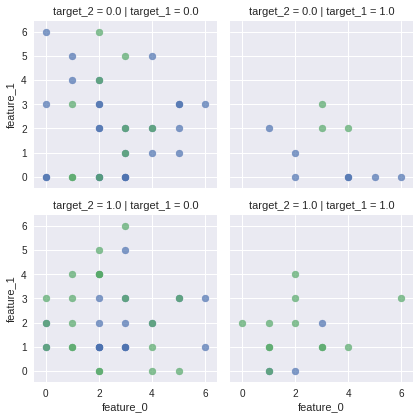

In [23]:
data = datasets.make_multilabel_classification(random_state=random_state)
draw_generated_multilabeled_dataset(data[0], data[1])

## The Olivetti faces
(С) AT&T Laboratories Cambridge.

# info
Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.


--------------------------------------------------------------------------------

data size (400, 4096)
images size (400, 64, 64)
target size (400,)


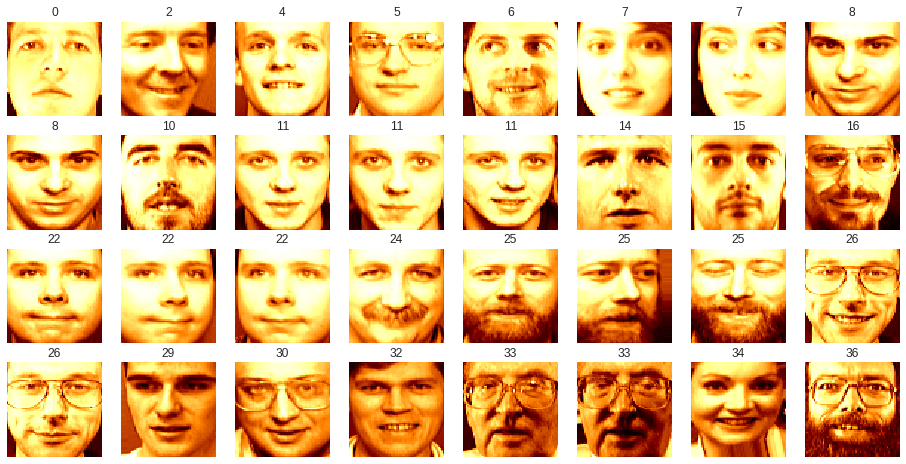

In [24]:
data = datasets.fetch_olivetti_faces()

print('# info')
print_dataset_info(data)

plt.figure(figsize=(16,8))
#img_count = 32
idxs = sorted(random.sample(range(len(data.images)), k=32))
for idx, (img, target_name) in enumerate(zip(data.images[idxs], data.target[idxs])):
    plt.subplot(4, 8, idx + 1)
    plt.title(target_name)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.afmhot)

##  The 20 newsgroups text

In [25]:
data = datasets.fetch_20newsgroups()

print('# topics')
pprint(list(data.target_names))
print('# example')
pprint(random.choice(data.data))

# topics
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
# example
('From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau)\n'
 'Subject: Re: An Anecdote about Islam\n'
 'Organization: Technical University Braunschweig, Germany\n'
 'Lines: 28\n'
 '\n'
 'In article <114127@bu.edu>\n'
 'jaeger@buphy.bu.edu (Gregg Jaeger) writes:\n'
 ' \n'
 '>>When they are victimized they are Muslims. When they victimize others\n'
 '>>they are not True Muslims (tm) or no Muslims at all.\n'
 '>\n'
 '>>Quite annoying.\n'
 '>\n'
 ">I don't understand the point of this petty sarcasm. It is a basic\n"
 '>principle of Islam that if one is born muslim or 

Use Naive Bayes to analyze dataset

                    precision    recall  f1-score   support

       alt.atheism       0.68      0.68      0.68       319
     comp.graphics       0.92      0.89      0.91       389
         sci.space       0.81      0.90      0.85       394
talk.religion.misc       0.68      0.60      0.64       251

       avg / total       0.79      0.79      0.79      1353

--------------------------------------------------------------------------------
# top 10 words
alt.atheism: not, in, and, it, you, is, that, of, to, the
comp.graphics: graphics, you, in, it, is, for, of, and, to, the
sci.space: for, that, it, space, is, in, and, of, to, the
talk.religion.misc: not, it, in, you, is, and, that, to, of, the
--------------------------------------------------------------------------------
# confusion matrix


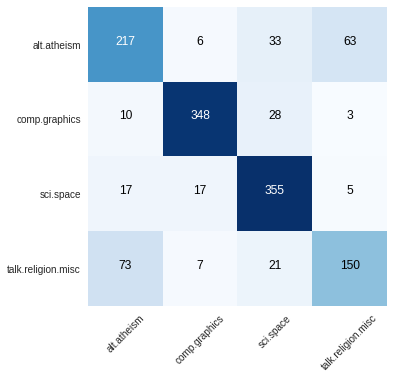

In [26]:
categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                                               remove=('headers', 'footers', 'quotes'),
                                               categories=categories)
newsgroups_test = datasets.fetch_20newsgroups(subset='test',
                                              remove=('headers', 'footers', 'quotes'),
                                              categories=categories)

vectorizer = feature_extraction.text.TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)

clf = naive_bayes.MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)

vectors_test = vectorizer.transform(newsgroups_test.data)
pred = clf.predict(vectors_test)

print(metrics.classification_report(y_pred=clf.predict(vectors_test), 
                                    y_true=newsgroups_test.target, 
                                    target_names=newsgroups_test.target_names))

print('-'*80)
print('# top 10 words')

def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.coef_[i])[-10:]
        print("{}: {}".format(category, ", ".join(feature_names[top10])))

show_top10(clf, vectorizer, newsgroups_train.target_names)

print('-'*80)
print('# confusion matrix')

confusion = metrics.confusion_matrix(y_pred=clf.predict(vectors_test), 
                                     y_true=newsgroups_test.target)

ax = plt.gca();
ax.grid(False)

plt.imshow(confusion, cmap=plt.cm.Blues);
plt.xticks(range(len(newsgroups_test.target_names)), newsgroups_test.target_names, rotation=45)
plt.yticks(range(len(newsgroups_test.target_names)), newsgroups_test.target_names);
thresh = confusion.max() / 2.
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, confusion[i, j],
             horizontalalignment="center",
             color="white" if confusion[i, j] > thresh else "black")

## mldata.org repository
:( unstable source, original page [mldata.org](http://mldata.org/repository/data/) usually returns:

_An internal server error occurred. Please try again later._

In general has 864 datasets

# info
mldata.org dataset: mnist-original

--------------------------------------------------------------------------------

target size (70000,)
data size (70000, 784)


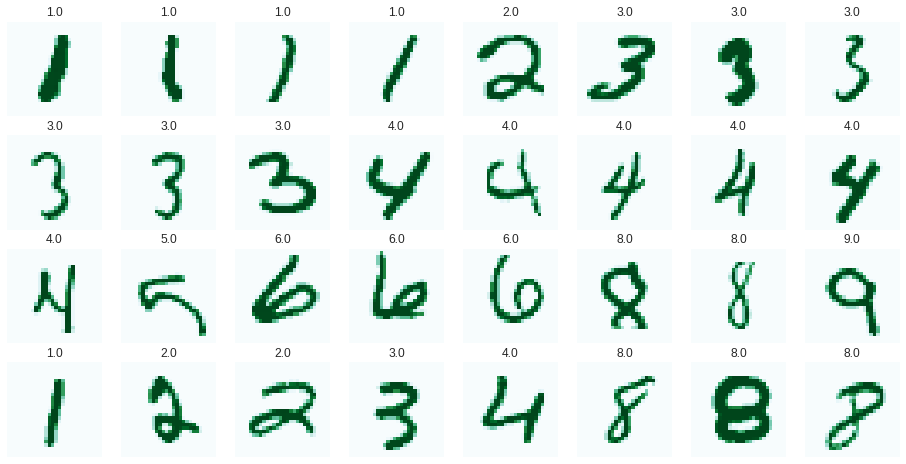

In [27]:
data = datasets.fetch_mldata('MNIST original')
print('# info')
print_dataset_info(data)

idxs = sorted(random.sample(range(len(data.data)), 32))

plt.figure(figsize=(16,8))
for idx, (sample, feature) in enumerate(zip(data.target[idxs], data.data[idxs])):
    plt.subplot(4, 8, idx + 1)
    plt.title(sample)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature.reshape(28,28), cmap=plt.cm.BuGn);


## The Labeled Faces in the Wild 

# info
LFW faces dataset

--------------------------------------------------------------------------------

data size (1288, 5550)
images size (1288, 50, 37, 3)
target size (1288,)
target_names size (7,)

# target names:
array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'],
      dtype='<U17')


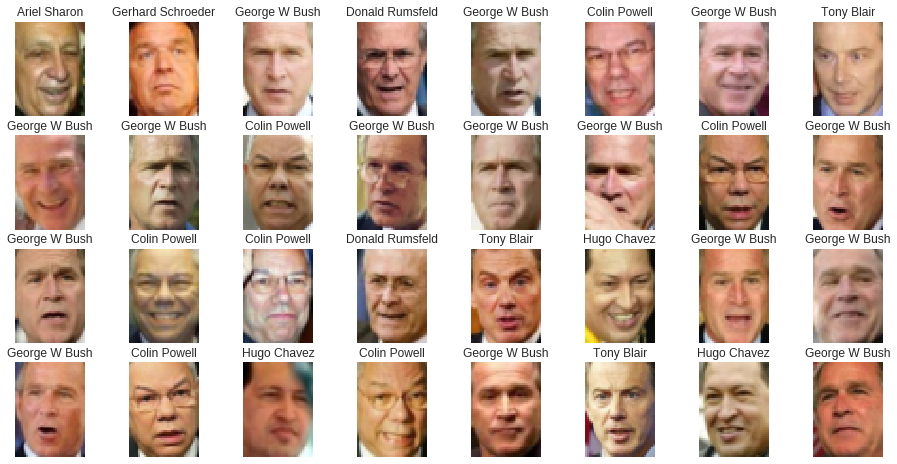

In [28]:
data = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=True)
print('# info')
print_dataset_info(data)
print()
print('# target names:')
pprint(data.target_names)

plt.figure(figsize=(16,8))
idxs = sorted(random.sample(range(len(data.images)), k=32))
for idx, (img, target_name) in enumerate(zip(data.images[idxs], data.target_names[data.target[idxs]])):
    plt.subplot(4, 8, idx + 1)
    plt.title(target_name)
    plt.xticks([])
    plt.yticks([])
    rgb = 256 - img
    plt.imshow(rgb, interpolation='none')
    #plt.imshow(img, cmap=plt.cm.copper)

### Covertype
more http://archive.ics.uci.edu/ml/datasets/Covertype

Forest covertype dataset.

A classic dataset for classification benchmarks, featuring categorical and
real-valued features.

The dataset page is available from UCI Machine Learning Repository

    http://archive.ics.uci.edu/ml/datasets/Covertype

Courtesy of Jock A. Blackard and Colorado State University.


--------------------------------------------------------------------------------

data size (581012, 54)
target size (581012,)

# attributes


,Name,Data Type,Measurement,Description
0,Elevation,quantitative,meters,Elevation in meters
1,Aspect,quantitative,azimuth,Aspect in degrees azimuth
2,Slope,quantitative,degrees,Slope in degrees
3,Horizontal_Distance_To_Hydrology,quantitative,meters,Horz Dist to nearest surface water features
4,Vertical_Distance_To_Hydrology,quantitative,meters,Vert Dist to nearest surface water features
5,Horizontal_Distance_To_Roadways,quantitative,meters,Horz Dist to nearest roadway
6,Hillshade_9am,quantitative,0 to 255 index,"Hillshade index at 9am, summer solstice"
7,Hillshade_Noon,quantitative,0 to 255 index,"Hillshade index at noon, summer soltice"
8,Hillshade_3pm,quantitative,0 to 255 index,"Hillshade index at 3pm, summer solstice"
9,Horizontal_Distance_To_Fire_Points,quantitative,meters,Horz Dist to nearest wildfire ignition points


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
9013,3205.0,184.0,15.0,270.0,42.0,2848.0,223.0,249.0,156.0,994.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123094,2960.0,152.0,21.0,309.0,109.0,5521.0,241.0,235.0,114.0,713.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137514,3119.0,32.0,9.0,85.0,16.0,2818.0,218.0,220.0,137.0,3449.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219709,2924.0,69.0,18.0,541.0,153.0,671.0,236.0,203.0,92.0,1442.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227839,3050.0,83.0,6.0,595.0,-16.0,1410.0,229.0,230.0,135.0,1209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234536,3404.0,289.0,11.0,342.0,28.0,2845.0,190.0,239.0,189.0,2123.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
357304,2593.0,181.0,20.0,30.0,9.0,1979.0,223.0,248.0,149.0,1448.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372731,2649.0,204.0,27.0,60.0,25.0,2010.0,195.0,252.0,177.0,2024.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
455765,3069.0,10.0,17.0,815.0,28.0,1082.0,199.0,203.0,138.0,860.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562935,2557.0,75.0,19.0,60.0,22.0,1478.0,240.0,200.0,83.0,1818.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



#features

#target


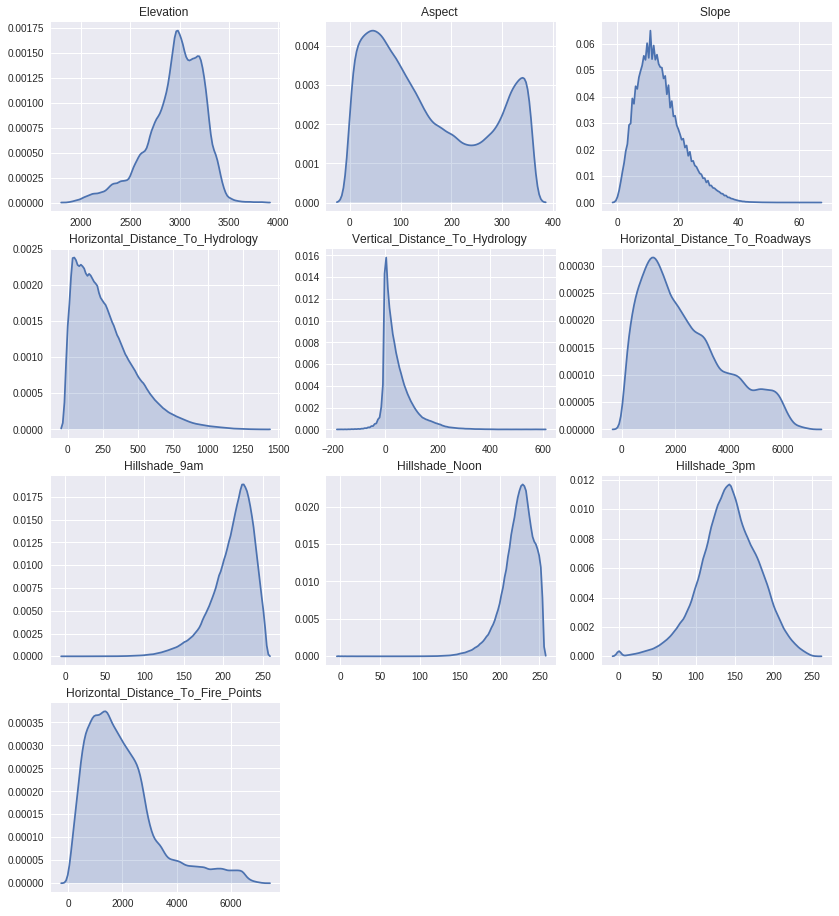

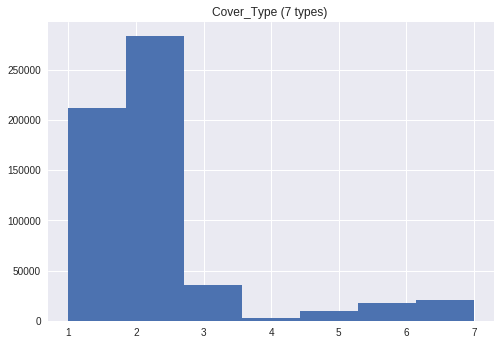

In [29]:
data = datasets.fetch_covtype()

print_dataset_info(data)

print()
print('# attributes')
attribute_information_header = \
    'Name / Data Type / Measurement / Description'
 # FIXME: main question about these fields:
 # - 4 of wilderness area
 # - 40 of soil type
 # - and target category forest cover type meaning
 #   
 # What does index mean for each of these features?
attribute_information_values = \
    'Elevation / quantitative /meters / Elevation in meters \n' \
    'Aspect / quantitative / azimuth / Aspect in degrees azimuth \n' \
    'Slope / quantitative / degrees / Slope in degrees \n' \
    'Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features \n' \
    'Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features \n' \
    'Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway \n' \
    'Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice \n' \
    'Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice \n' \
    'Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice \n' \
    'Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points \n' \
    'Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation \n' \
    'Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation \n' \
    'Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation'

features_titles = pd.read_csv(StringIO(attribute_information_values), sep='/', names=attribute_information_header.split('/'))
display(features_titles)
features_columns = list(features_titles.iloc[:10,0]) + ['Wilderness_Area_{}'.format(idx) for idx in range(4)] + ['Soil_Type_{}'.format(idx) for idx in range(40)]

display(pd.DataFrame(data.data, columns=features_columns).sample(10).sort_index())

print()
print('#features')

plt.figure(figsize=(14, 16))
for feature_idx, title in zip(range(10), features_titles.iloc[:10,0]):
    plt.subplot(4, 3, feature_idx + 1)
    plt.title(title)
    sns.kdeplot(data.data[:,feature_idx], shade=True)
    
print()
print('#target')
plt.figure()
plt.title(features_titles.iloc[-1,0])
plt.hist(data.target, bins=7);

### Wine (archive.ics.uci.edu)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


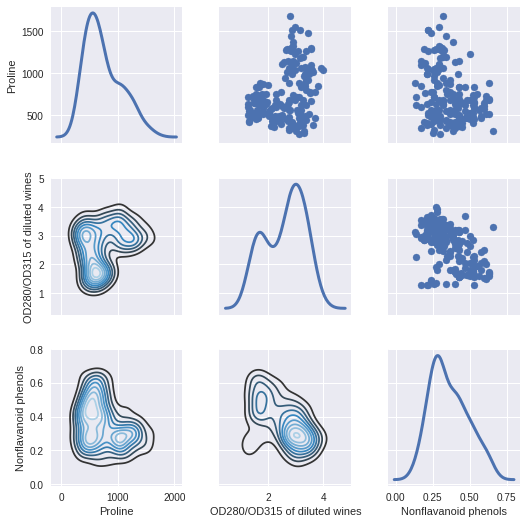

In [30]:
data = datasets.load_wine()
print_dataset_info(data)
feature_names = [
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash  ',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline',
]
print_features(data, feature_names)
draw_pair_grid(data.data, feature_names)

Other datasets from archive:

- Geo-Magnetic field and WLAN dataset for indoor localisation from wristband and smartphone Data Set 
http://archive.ics.uci.edu/ml/datasets/Geo-Magnetic+field+and+WLAN+dataset+for+indoor+localisation+from+wristband+and+smartphone
`indoor navigation`

- NIPS Conference Papers 1987-2015 Data Set 
http://archive.ics.uci.edu/ml/datasets/NIPS+Conference+Papers+1987-2015
`text analylisis` `research analysis`

- Facebook Comment Volume Dataset Data Set 
http://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset
`social analysics` `fake/bullying`

- News Aggregator
http://archive.ics.uci.edu/ml/datasets/News+Aggregator
`fake/bullying`, `topic modeling`

- Online News Popularity
http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity
`topic modeling`, `popularity`

- Sentiment Labelled Sentences
http://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences
`sentiments`

- Forest fires
http://archive.ics.uci.edu/ml/datasets/Forest+Fires
Number of Instances: 517
`Regression`

- Statlog (Landsat Satellite)
http://archive.ics.uci.edu/ml/datasets/Statlog+%28Landsat+Satellite%29
`Classification`

### Reuters Corpus Volume I (RCV1)

In [31]:
# not return 404 and will be fixed soon
# https://github.com/scikit-learn/scikit-learn/issues/9490

#data = datasets.fetch_rcv1()
#print_dataset_info(data)

# feature_names = [
# ]
# print_features(data, feature_names)
# draw_pair_grid(data.data, feature_names)

### California housing

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.



--------------------------------------------------------------------------------

data size (20640, 8)
target size (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


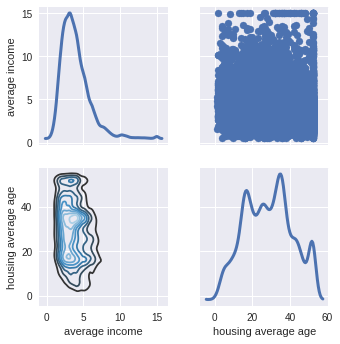

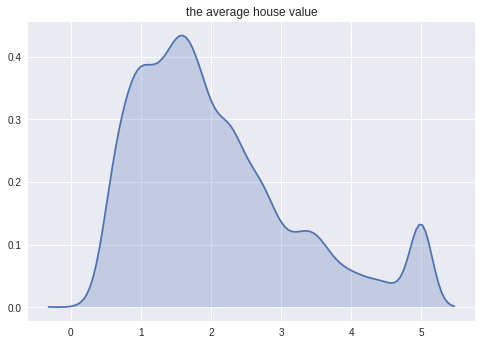

In [32]:
data = datasets.fetch_california_housing()
print_dataset_info(data)
feature_names = [
    'average income',
    'housing average age',
    'average rooms',
    'average bedrooms',
    'population',
    'average occupation',
    'latitude',
    'longitude',
]
print_features(data)

draw_pair_grid(data.data, feature_names, idxs=[0,1])

plt.figure()
plt.title('the average house value')
sns.kdeplot(data.target, shade=True);

### The Knowledge Discovery and Data Mining (KDD) Cup '99

The KDD Cup '99 dataset was created by processing the tcpdump portions
of the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset,
created by MIT Lincoln Lab [1]. The artificial data was generated using
a closed network and hand-injected attacks to produce a large number of
different types of attack with normal activity in the background.
As the initial goal was to produce a large training set for supervised
learning algorithms, there is a large proportion (80.1%) of abnormal
data which is unrealistic in real world, and inappropriate for unsupervised
anomaly detection which aims at detecting 'abnormal' data, ie

1) qualitatively different from normal data.

2) in large minority among the observations

,0,1,2
count,58725.000000,58725.000000,58725.000000
unique,177.000000,434.000000,10412.000000
top,-2.302585,10.906691,9.025708
freq,58326.000000,2143.000000,2133.000000


,0,1,2
58720,-2.30259,5.73689,7.53961
58721,-2.30259,5.64226,7.7346
58722,-2.30259,5.3137,7.09016
58723,-2.30259,5.67367,7.09016
58724,-2.30259,5.38953,7.1181


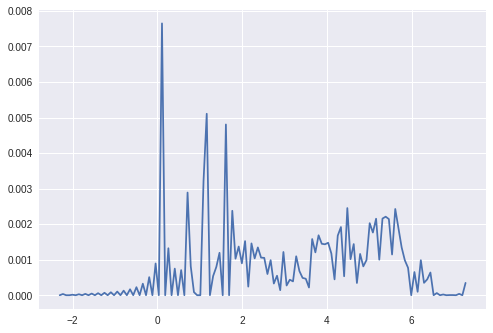

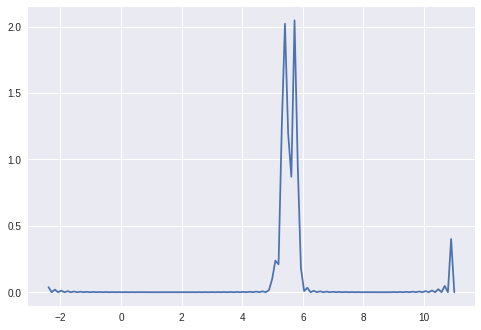

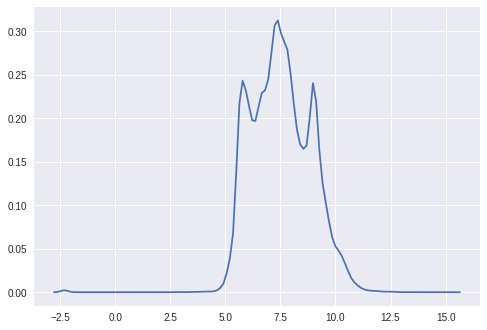

In [33]:
# subsets = ['SA', 'SF', 'http', 'smtp']
data = datasets.fetch_kddcup99('http')
print_features(data)
for feature in data.data.T:
    plt.figure()
    sns.kdeplot(feature);